In [1]:
import pandas as pd
import os
from scipy.sparse import csr_matrix
import numpy as np
from IPython.display import display_html
import warnings

import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
%matplotlib inline 


In [2]:
import pandas as pd

# Specify the full file path
file_path = '/Users/nirviksahoo/Desktop/Book Rec/goodreads_books_poetry.json'

# Read the JSON file into a Pandas DataFrame
books_metadata = pd.read_json(file_path, lines=True)


In [3]:
books_metadata.columns.values

array(['isbn', 'text_reviews_count', 'series', 'country_code',
       'language_code', 'popular_shelves', 'asin', 'is_ebook',
       'average_rating', 'kindle_asin', 'similar_books', 'description',
       'format', 'link', 'authors', 'publisher', 'num_pages',
       'publication_day', 'isbn13', 'publication_month',
       'edition_information', 'publication_year', 'url', 'image_url',
       'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'], dtype=object)

In [4]:
books_metadata_selected = books_metadata[['book_id','title', 'average_rating', 'is_ebook', 'num_pages', 
                                          'publication_year', 'ratings_count', 'language_code' ]]
books_metadata_selected.sample(5)

,book_id,title,average_rating,is_ebook,num_pages,publication_year,ratings_count,language_code
25069,8283635,Collected Poems And Plays Of Rabindranath Tagore,4.38,true,,,1,
11662,2406087,Double Exposure,4.33,false,74,2003,9,
5805,2050259,"The World's Wife, Carol Ann Duffy",4.16,false,144,2007,131,
33261,6123825,Great Tales and Poems,4.18,false,236,1993,8,eng
20627,9238578,Poets and Artists (October 2010),5.00,false,100,2010,10,eng


In [5]:
trend=pd.DataFrame(books_metadata.groupby('book_id')['average_rating'].mean())
trend['total number of ratings'] = pd.DataFrame(books_metadata.groupby('book_id')['average_rating'].count()) 
trend.head()

,average_rating,total number of ratings
book_id,,
234,4.17,1
236,4.03,1
241,3.35,1
244,4.04,1
254,3.95,1


/var/folders/_s/g9sh0qnd1w18dk71zx1m7jq80000gn/T/ipykernel_97112/2043572196.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


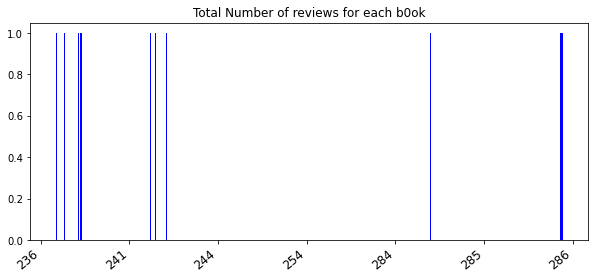

In [6]:
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='b')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each b0ok")
plt.show()

In [7]:
books_metadata.groupby('book_id')['average_rating'].mean().sort_values(ascending=False).head()

book_id
7636081     5.0
3862194     5.0
35520865    5.0
13007980    5.0
3939513     5.0
Name: average_rating, dtype: float64

In [9]:
# Sort the trend DataFrame by average rating and total number of ratings in descending order
sorted_books = trend.sort_values(by=['average_rating', 'total number of ratings'], ascending=False)

# Select the top 10 books
top_10_books = sorted_books.head(10)

# Iterate through the top 10 books and print their information
for book_id, row in top_10_books.iterrows():
    # Get book information from books_metadata_selected DataFrame
    book_info = books_metadata_selected.loc[books_metadata_selected['book_id'] == book_id].iloc[0]
    
    # Extract relevant information
    book_title = book_info['title']
    book_rating = row['average_rating']
    num_ratings = row['total number of ratings']
    
    # Print book information
    print(f"Book ID: {book_id}")
    print(f"Title: {book_title}")
    print(f"Average Rating: {book_rating:.2f}")
    print(f"Total Number of Ratings: {num_ratings}")
    print("------------------------------")


Book ID: 436393
Title: Autobiography
Average Rating: 5.00
Total Number of Ratings: 1.0
------------------------------
Book ID: 446454
Title: on melody dispatch
Average Rating: 5.00
Total Number of Ratings: 1.0
------------------------------
Book ID: 521050
Title: Editing of Emily Dickinson: A Reconsideration
Average Rating: 5.00
Total Number of Ratings: 1.0
------------------------------
Book ID: 568982
Title: Ghastlies, Goops & Pincushions: Nonsense Verse
Average Rating: 5.00
Total Number of Ratings: 1.0
------------------------------
Book ID: 659690
Title: Years Later
Average Rating: 5.00
Total Number of Ratings: 1.0
------------------------------
Book ID: 723076
Title: Translating the Body
Average Rating: 5.00
Total Number of Ratings: 1.0
------------------------------
Book ID: 860818
Title: Drift Of The Hunt
Average Rating: 5.00
Total Number of Ratings: 1.0
------------------------------
Book ID: 906109
Title: The Lonely Hearts Killers
Average Rating: 5.00
Total Number of Ratings: 